# Import required libraries

In [1]:
import geopandas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Load the data obtained from Web of Science

In [2]:
microscopy_papers = pd.read_table("Data/wos_publications_by_country_microscopy.txt")
dl_microscopy_papers = pd.read_table("Data/wos_publications_by_country_deeplearningmicroscopy.txt")
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
microscopy_papers.head()

,Countries/Regions,Record Count,"% of 1,421,462"
0,USA,324925,22.859
1,PEOPLES R CHINA,257432,18.110
2,GERMANY,126246,8.881
3,JAPAN,107076,7.533
4,ENGLAND,78007,5.488


# Correct country names to match geopandas

In [3]:
def correct_country_names(pubs):
    for country in pubs["Countries/Regions"].tolist():
        n_publications = pubs.loc[pubs["Countries/Regions"] == country]["Record Count"].iloc[0]
        if country == "USA":
            c_country = "UNITED STATES OF AMERICA"
        elif country in ["ENGLAND", "SCOTLAND", "WALES", "NORTHERN IRELAND", "NORTH IRELAND"]:
            c_country = "UNITED KINGDOM"
        elif country == "PEOPLES R CHINA":
            c_country = "CHINA"
        elif country == "CZECH REPUBLIC":
            c_country = "CZECHIA"
        elif country == "U ARAB EMIRATES":
            c_country = "UNITED ARAB EMIRATES"
        else:
            c_country = country
        
        if c_country != country:
            if c_country in pubs["Countries/Regions"].tolist():
                idx = pubs.index[pubs["Countries/Regions"] == c_country][0]
                total_pubs = pubs.loc[pubs["Countries/Regions"] == c_country]["Record Count"].iloc[0] + n_publications
                pubs.iat[idx, 1] += n_publications
            else:
                new_row = pd.DataFrame({"Countries/Regions": c_country, "Record Count": n_publications}, index=[0])
                pubs = pd.concat([pubs, new_row])
            
    return pubs
            
microscopy_papers = correct_country_names(microscopy_papers)
dl_microscopy_papers = correct_country_names(dl_microscopy_papers)


# Add publication data to world dataframe

In [4]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world["m_pubs"] = [np.nan] * 176
world["dlm_pubs"] = [np.nan] * 176

world["name"] = world["name"].str.upper()

for country in microscopy_papers.loc[:,"Countries/Regions"].tolist():
    if country in world["name"].tolist():
        idx = world.index[world["name"] == country]
        idx = idx.tolist()
        if len(idx) > 0:
            idx = idx[0]
            try:
                world.iat[idx, 6] = microscopy_papers.loc[microscopy_papers["Countries/Regions"] == country]["Record Count"].iloc[0]

                if country in dl_microscopy_papers["Countries/Regions"].tolist():
                    world.iat[idx, 7] = dl_microscopy_papers.loc[dl_microscopy_papers["Countries/Regions"] == country]["Record Count"].iloc[0]
            except ValueError:
                pass
            
world['dlm_per_m'] = world.dlm_pubs / world.m_pubs
world['dlm_per_m'] = np.log10(world['dlm_per_m'])
world["dlm_pubs"] = np.log10(world["dlm_pubs"])
world["m_pubs"] = np.log10(world["m_pubs"])

# Plot log10 of publications containing the keyword microscopy

<Axes: >

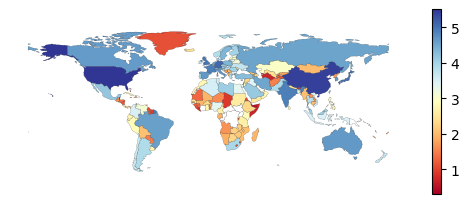

In [5]:
fig, ax = plt.subplots(1, 1)
ax.set_axis_off()

world.plot(column='m_pubs', ax=ax, legend=True, cmap='RdYlBu', missing_kwds={'color': 'white'}, edgecolor="black", linewidth=0.1, legend_kwds={'shrink': 0.5})
#plt.savefig("m_pubs.png", dpi=450)

# Plot log10 of publications containing the keywords deep learning microscopy

<Axes: >

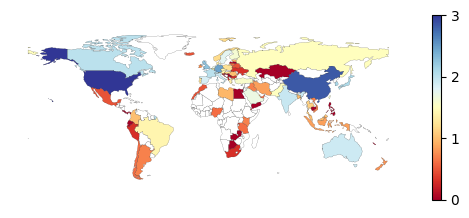

In [6]:
fig, ax = plt.subplots(1, 1)
ax.set_axis_off()

world.plot(column='dlm_pubs', ax=ax, legend=True, cmap='RdYlBu', missing_kwds={'color': 'white'}, edgecolor="black", linewidth=0.1, legend_kwds={'shrink': 0.5})
#plt.savefig("m_pubs.png", dpi=450)

# Plot log10 of ratio between publications containing the keywords deep learning microscopy and just microscopy

<Axes: >

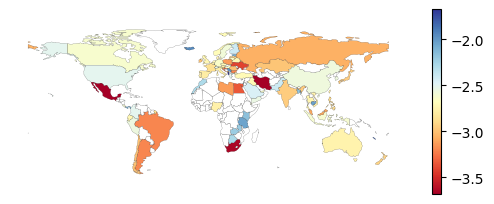

In [7]:
fig, ax = plt.subplots(1, 1)
ax.set_axis_off()

world.plot(column='dlm_per_m', ax=ax, legend=True, cmap='RdYlBu', missing_kwds={'color': 'white'}, edgecolor="black", linewidth=0.1, legend_kwds={'shrink': 0.5})
#plt.savefig("m_pubs.png", dpi=450)

# Normalize data by dividing by the number of total publications with any keyword
### Since it's not possible to download the data of every publication in web of science (due to download limitation) we can do this by only counting papers since 2014

In [8]:
microscopy_papers_s2014 = pd.read_table("Data/wos_publications_by_country_microscopy_since_2014.txt")
dl_microscopy_papers_s2014 = pd.read_table("Data/wos_publications_by_country_deeplearningmicroscopy_since_2014.txt")
any_papers_s2014 = pd.read_table("Data/wos_publications_by_country_any_since_2014.txt")
world_s2014 = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
microscopy_papers_s2014.head()

,Countries/Regions,Record Count,"% of 666,741"
0,PEOPLES R CHINA,163791.0,24.566
1,USA,126150.0,18.920
2,GERMANY,54022.0,8.102
3,INDIA,53268.0,7.989
4,ENGLAND,32854.0,4.928


# Once again correct country names to match geopandas

In [9]:
microscopy_papers_s2014 = correct_country_names(microscopy_papers_s2014)
dl_microscopy_papers_s2014 = correct_country_names(dl_microscopy_papers_s2014)
any_papers_s2014 = correct_country_names(any_papers_s2014)

In [10]:
microscopy_papers_s2014.loc[microscopy_papers_s2014["Countries/Regions"] == "UNITED STATES OF AMERICA"]

,Countries/Regions,Record Count,"% of 666,741"
0,UNITED STATES OF AMERICA,126150.0,NaN


# Add publication data to world dataframe

In [11]:
world_s2014 = world_s2014[(world_s2014.pop_est>0) & (world.name!="Antarctica")]

world_s2014["any_pubs"] = [np.nan] * 176
world_s2014["m_pubs"] = [np.nan] * 176
world_s2014["dlm_pubs"] = [np.nan] * 176

world_s2014["name"] = world_s2014["name"].str.upper()

for country in any_papers_s2014.loc[:,"Countries/Regions"].tolist():
    if country in world_s2014["name"].tolist():
        idx = world_s2014.index[world_s2014["name"] == country]
        idx = idx.tolist()
        if len(idx) > 0:
            idx = idx[0]
            try:
                world_s2014.iat[idx, 6] = any_papers_s2014.loc[any_papers_s2014["Countries/Regions"] == country]["Record Count"].iloc[0]
                if country in microscopy_papers_s2014["Countries/Regions"].tolist():
                    world_s2014.iat[idx, 7] = microscopy_papers_s2014.loc[microscopy_papers_s2014["Countries/Regions"] == country]["Record Count"].iloc[0]
                if country in dl_microscopy_papers["Countries/Regions"].tolist():
                    world_s2014.iat[idx, 8] = dl_microscopy_papers.loc[dl_microscopy_papers["Countries/Regions"] == country]["Record Count"].iloc[0]
            except ValueError:
                pass
            
world_s2014['dlm_per_m'] = world_s2014.dlm_pubs / world_s2014.m_pubs
world_s2014["dlm_per_any"] = world_s2014.dlm_pubs / world_s2014.any_pubs
world_s2014["m_per_any"] = world_s2014.m_pubs / world_s2014.any_pubs
world_s2014['dlm_per_m'] = np.log10(world_s2014['dlm_per_m'])
world_s2014["dlm_pubs"] = np.log10(world_s2014["dlm_pubs"])
world_s2014["m_pubs"] = np.log10(world_s2014["m_pubs"])
world_s2014["dlm_per_any"] = np.log10(world_s2014["dlm_per_any"])
world_s2014["m_per_any"] = np.log10(world_s2014["m_per_any"])
world_s2014["any_pubs"] = np.log10(world_s2014["any_pubs"])

# Plot log10 of publications containing the keyword microscopy since 2014 normalized to total publication records

<Axes: >

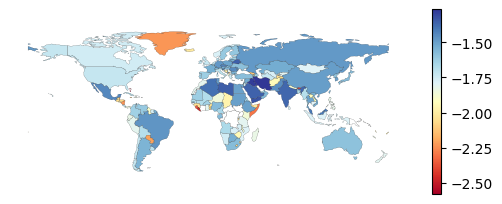

In [12]:
fig, ax = plt.subplots(1, 1)
ax.set_axis_off()

world_s2014.plot(column='m_per_any', ax=ax, legend=True, cmap='RdYlBu', missing_kwds={'color': 'white'}, edgecolor="black", linewidth=0.1, legend_kwds={'shrink': 0.5})
#plt.savefig("m_pubs.png", dpi=450)

# Plot log10 of publications containing the keywords deep learning microscopy since 2014 normalized to total publication records

<Axes: >

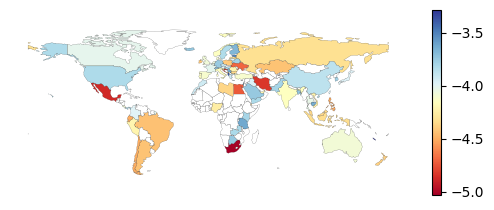

In [13]:
fig, ax = plt.subplots(1, 1)
ax.set_axis_off()

world_s2014.plot(column='dlm_per_any', ax=ax, legend=True, cmap='RdYlBu', missing_kwds={'color': 'white'}, edgecolor="black", linewidth=0.1, legend_kwds={'shrink': 0.5})
#plt.savefig("m_pubs.png", dpi=450)